## Ta’lim texnikasi, o‘quvchilarning faolligi va ta’lim natijalari to‘g‘risidagi ma’lumotlardan foydalangan holda o‘quvchilar faoliyatini yaxshilashda turli o‘qitish usullarining samaradorligini ma’lumotlarini to’plang.

In [3]:
#kutubxonalarni yuklash
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import math

In [14]:
#dastlabki qiymatlarni olish
np.random.seed(42)

# Ma'lumot ustunlar va satrlar sonini aniqlash
num_rows = 500
num_columns = 8

In [15]:
#chegaraviy ma'lumotlar ro'yxati
texnikalar = ["Induksiya metodi", "Deduksiya metodi", "Analogiya metodi", "Taqqoslash usuli", "Fikriy hujum metodi", "6x6x6 metodi", "klaster metodi", "zakovatli zukko metodi"]
yonalishlar = ["Kompyuter ilmlari", "Sun’iy intellekt", "Dasturiy injiniring", "Mаtematik tahlil", "Algebra va geometriya", "Ehtimollar nazariyasi", "Differensial tenglamalar", "Matematik fizika va funksional analiz", "Matematik modellashtirish"]
fakultetlar = ['Intellektual tizimlar va K.T.', 'Matematika']

In [16]:
#Kafedralarni hosil qilish
yonalishlar_data_index = np.random.randint(0, high=len(yonalishlar), size=num_rows, dtype='l')
yonalishlar_data = [yonalishlar[i] for i in yonalishlar_data_index]

In [17]:
#Fakultetlarni hosil qilish
fakultet_data = []
for i in yonalishlar_data:
    if i==yonalishlar[0] or i==yonalishlar[1] or i==yonalishlar[2]:
        fakultet_data.append(fakultetlar[0])
    else:
        fakultet_data.append(fakultetlar[1])


In [18]:
#Ta'lim texnikasi yaratish 
tecnic_data_index = np.random.randint(0, high=len(texnikalar), size=num_rows, dtype='l')
tecnic_data = [texnikalar[i] for i in tecnic_data_index]

In [19]:
#Dastlabki o'quvchilar faollik
default_activete = []

default_activete1 = np.random.randint(45, high=85, size=int(num_rows*0.6), dtype='l')
default_activete2 = np.random.randint(0, high=45, size=int(num_rows*0.4), dtype='l')

default_activete_index = np.hstack((default_activete1, default_activete2))
default_activete = [i for i in default_activete_index]
np.random.shuffle(default_activete) 

In [24]:
#Texnikadan keyin faolligi
after_activete = []

after_activete1 = np.random.randint(65, high=98, size=int(num_rows*0.75), dtype='l')
after_activete2 = np.random.randint(0, high=65, size=int(num_rows*0.25), dtype='l')

after_activete_index = np.hstack((after_activete1, after_activete2))
after_activete = [i for i in after_activete_index]
np.random.shuffle(after_activete) 

In [25]:
#natijani hosil qilish
result_texnic = []
for i in range(num_rows):
    result_texnic.append(after_activete[i] - default_activete[i])

In [26]:
# Matnli va sonli ma'lumotlarni DataFrame ga birlashtirish
data = np.column_stack((yonalishlar_data, fakultet_data, tecnic_data, default_activete, after_activete, result_texnic ))
column_names = ["Kafedralar", 'Fakultetlar', 'Ta’lim texnikasi','Dastlabki faollik (%)', 'Keyingi faollik (%)','Natija (%)']
df = pd.DataFrame(data, columns=column_names)

# CSV faylni saqlash
df.to_csv('task_2_3.csv', index=False)

In [27]:
# Namoyish etish
%matplotlib inline
base = pd.read_csv('task_2_3.csv', sep=',', names=column_names) # csv faylni o'qish
base.head()

,Kafedralar,Fakultetlar,Ta’lim texnikasi,Dastlabki faollik (%),Keyingi faollik (%),Natija (%)
0,Kafedralar,Fakultetlar,Ta’lim texnikasi,Dastlabki faollik (%),Keyingi faollik (%),Natija (%)
1,Differensial tenglamalar,Matematika,Taqqoslash usuli,28,91,63
2,Mаtematik tahlil,Matematika,klaster metodi,66,96,30
3,Matematik fizika va funksional analiz,Matematika,Analogiya metodi,74,73,-1
4,Algebra va geometriya,Matematika,Fikriy hujum metodi,49,71,22


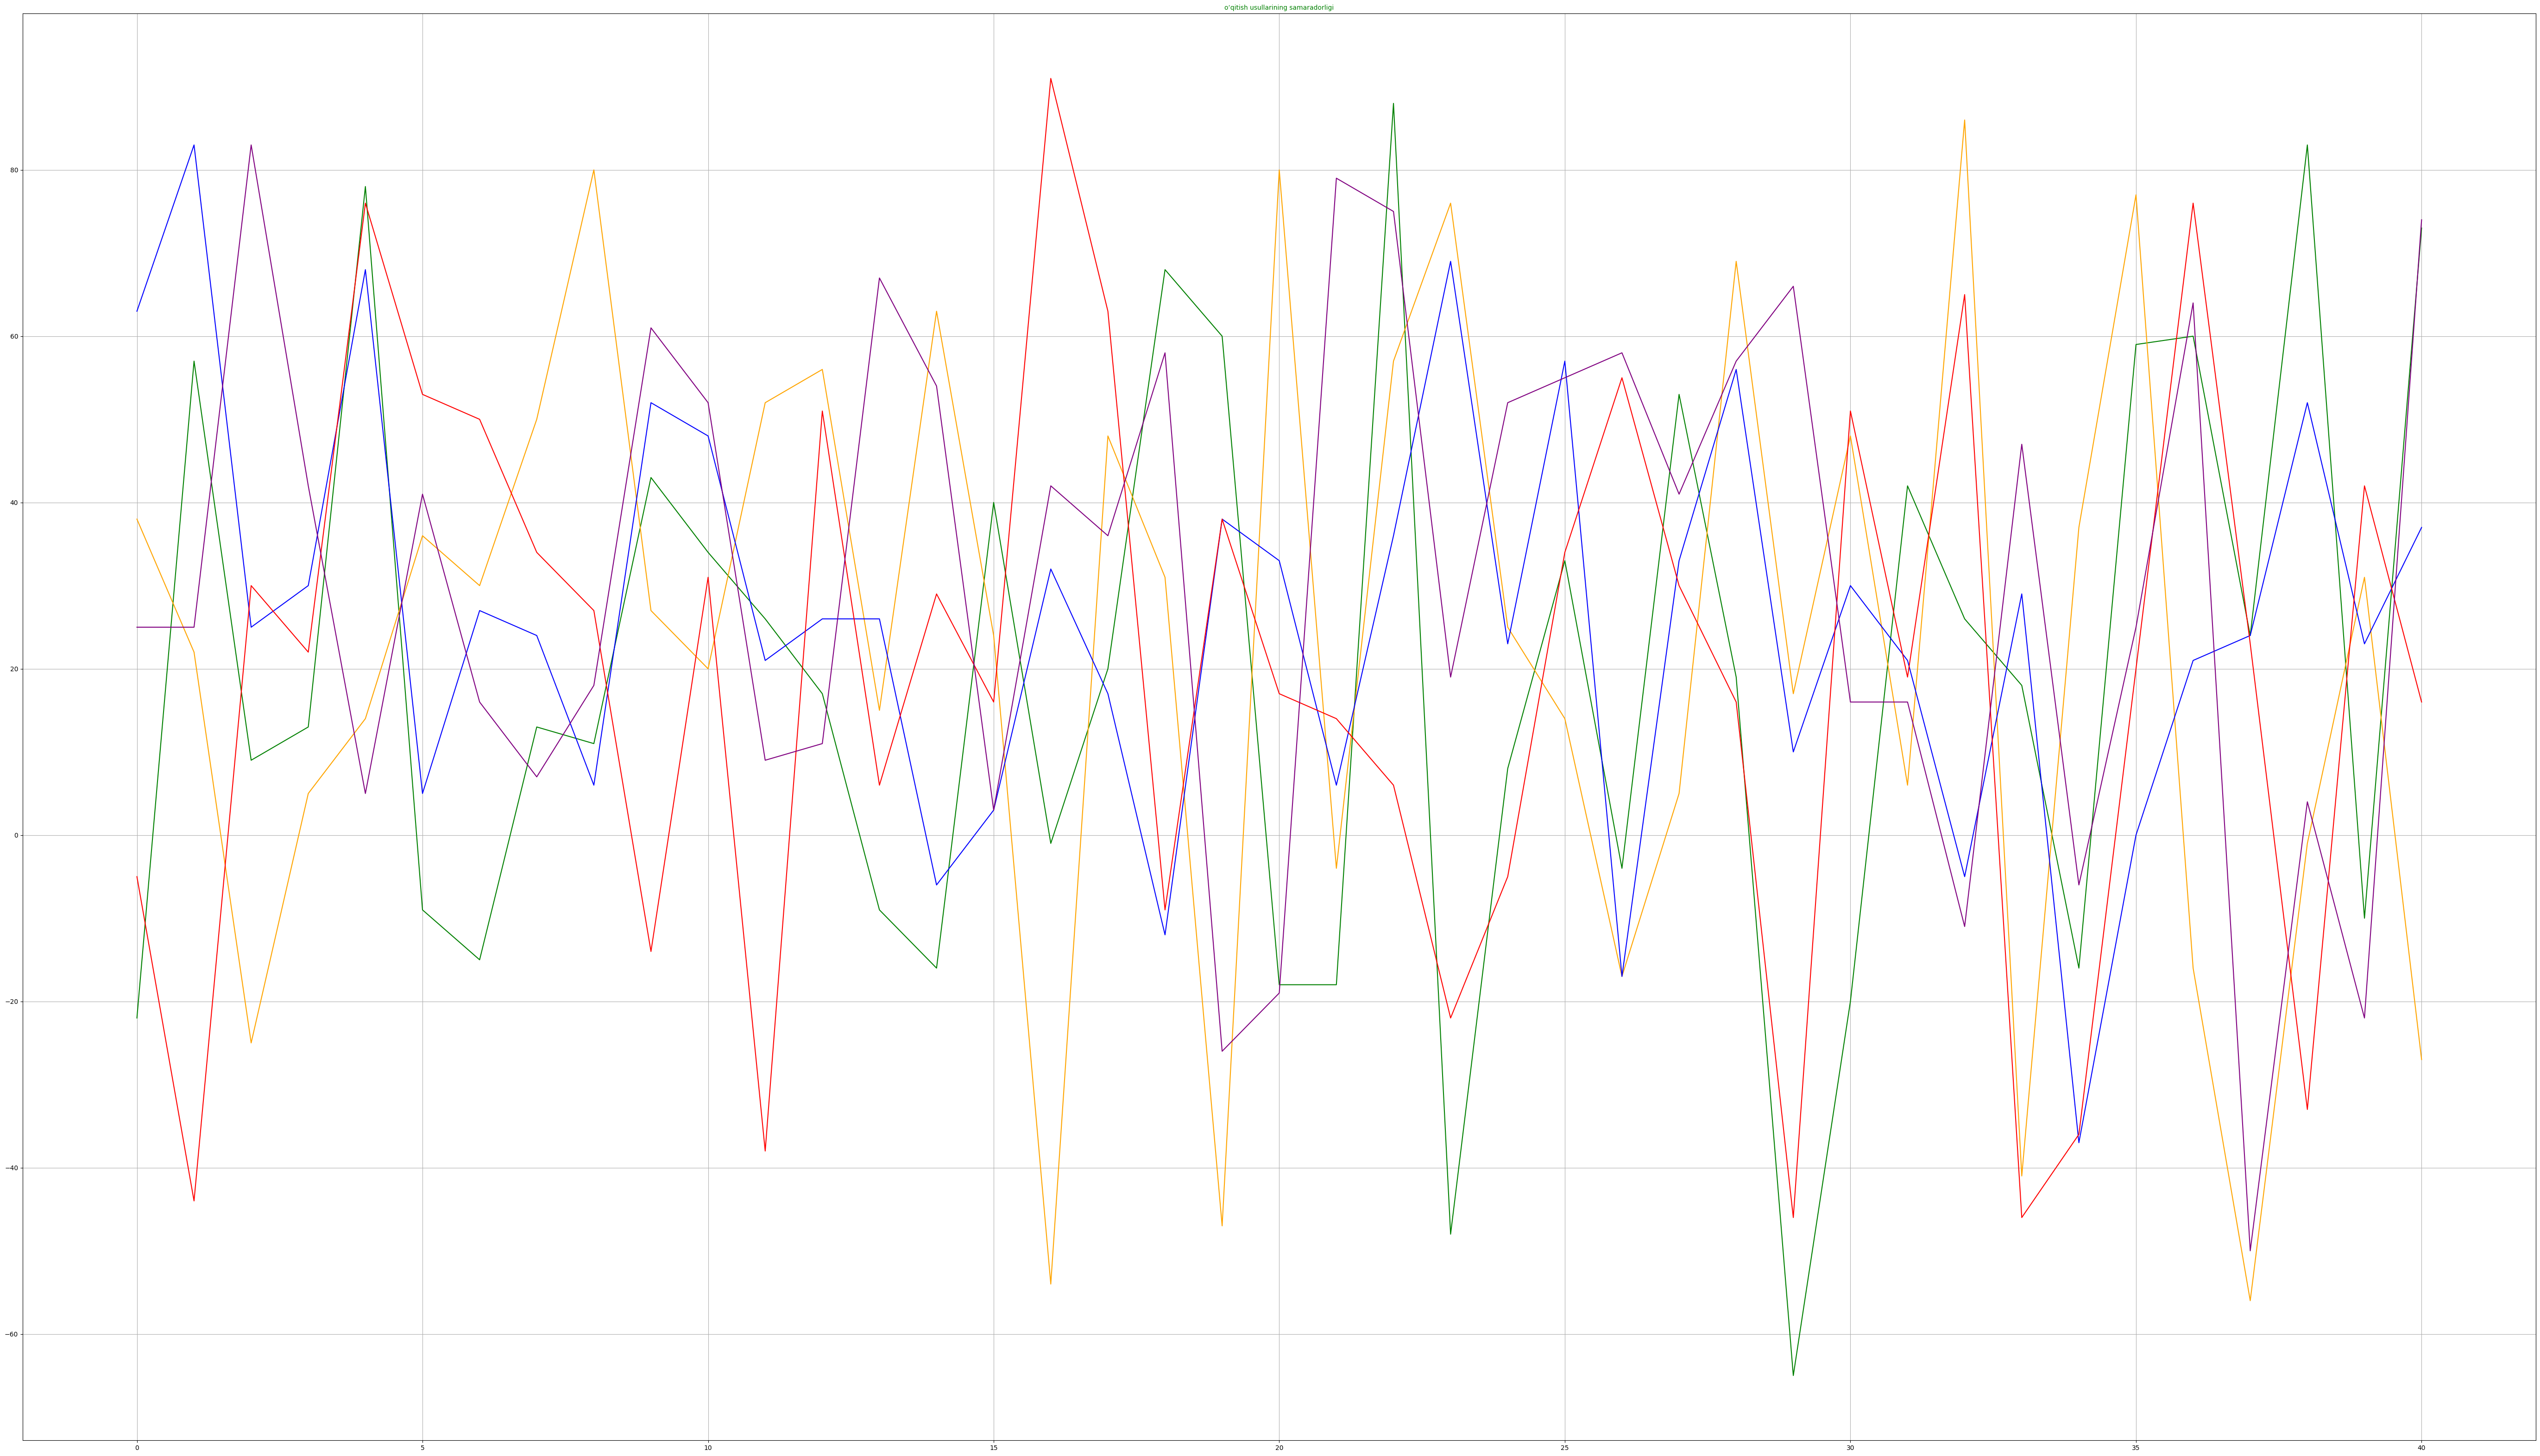

In [57]:
data1 = np.column_stack((tecnic_data, result_texnic ))

def filter_arr(arr, name):
    newarr = []
    for i in arr:
        if i[0]==name:
            newarr.append(round(int(i[1])))
        if len(newarr)>40:
            break
    return newarr

met1 = filter_arr(data1, texnikalar[0])
met2 = filter_arr(data1, texnikalar[1])
met3 = filter_arr(data1, texnikalar[2])
met4 = filter_arr(data1, texnikalar[3])
met5 = filter_arr(data1, texnikalar[4])
met6 = filter_arr(data1, texnikalar[5])
met7 = filter_arr(data1, texnikalar[6])
met8 = filter_arr(data1, texnikalar[7])

plt.figure(figsize=(70, 40 ))
plt.grid(True)
plt.plot(met1,  label=texnikalar[0], color = 'green')
plt.plot(met2,  label=texnikalar[0], color = 'orange')
plt.plot(met3,  label=texnikalar[0], color = 'blue')
plt.plot(met4,  label=texnikalar[0], color = 'red')
plt.plot(met5,  label=texnikalar[0], color = 'purple')
# plt.plot(met6,  label=texnikalar[0], color = 'brown')
# plt.plot(met7,  label=texnikalar[0], color = 'pink')
# plt.plot(met8,  label=texnikalar[0], color = 'gray')
plt.title("o‘qitish usullarining samaradorligi", fontsize=10, color="green")
plt.show()

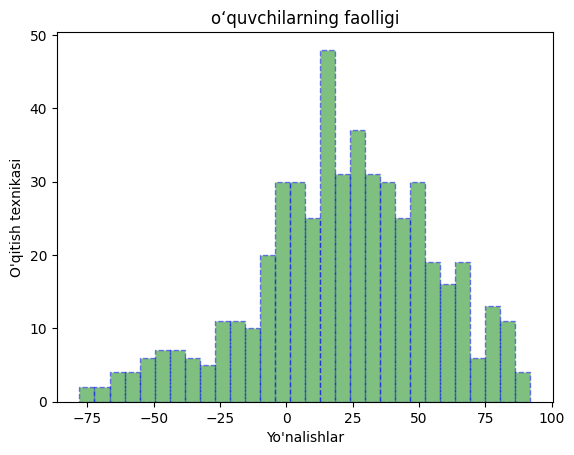

In [58]:
data = pd.read_csv('task_2_3.csv')
 
# initializing the data
x = data['Natija (%)']
 
# plotting the data
plt.hist(x, bins=30, color='green', edgecolor='blue', linestyle='--', alpha=0.5)
 
# Adding title to the plot
plt.title("o‘quvchilarning faolligi")
 
# Adding label on the y-axis
plt.ylabel("O'qitish texnikasi")
 
# Adding label on the x-axis
plt.xlabel("Yo'nalishlar")
 
plt.show()